We will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.
The file `ex1data2.txt` contains a training set of housing prices in Port- land, Oregon. The first column is the **size of the house** (in square feet), the second column is the **number of bedrooms**, and the third column is the **price of the house**.

      0  1       2
0  2104  3  399900
1  1600  3  329900
2  2400  3  369000
3  1416  2  232000
4  3000  4  539900


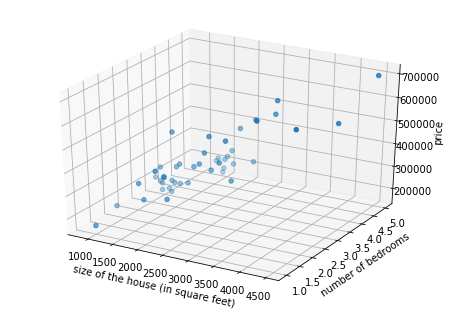

We have 47 houses data


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv('ex1data2.txt', header=None)

print(df.head())

#Lets try to visualize the data
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df[0], df[1], df[2])
ax.set_zlabel('price')
plt.xlabel('size of the house (in square feet)')
plt.ylabel('number of bedrooms')
plt.show()
print('We have 47 houses data')

In [2]:
import numpy as np
#Data preparation

#We are not adding column of ones here because we want to normalize the features first
X = df.drop([2], axis=1).values
y = df[2].values

print(X[:1], y[:1])

[[2104    3]] [399900]


Now we will start with **normalization** of the features because **size of the house** is in different range as compared to **number of bedrooms**

In [3]:
def featureNormalize(X):
    mu = X.mean(axis=0)
    sigma = X.std(axis=0)
    X_norm = (X - mu)/sigma
    return (X_norm, mu, sigma)

Data Preparation

In [4]:
X_norm, mu, sigm = featureNormalize(X)

# now lets add ones to the input feature X for theta0

ones = np.ones((X_norm.shape[0], 1), float)
X = np.concatenate((ones,X_norm), axis=1)

print(X[:1])

[[ 1.          0.13141542 -0.22609337]]


In [5]:
#Cost function
def computeCostMulti(X, y, theta):
    m = X.shape[0]
    hypothesis = X.dot(theta) # h_theta = theta.T * x = theta0*x0 + theta1*x1 + ... + thetan*xn
    J = (1/(2*m)) * (np.sum(np.square(hypothesis-y)))    
    return J

In [6]:
theta = np.zeros(X.shape[1])
J_cost = computeCostMulti(X, y, theta)

print('J_Cost', J_cost)

J_Cost 65591548106.5


In [7]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = X.shape[0]
    J_history = np.zeros(num_iters)
    for iter in np.arange(num_iters):
        h = X.dot(theta)
        theta = theta - alpha * (1/m) * X.T.dot(h-y)
        J_history[iter] = computeCostMulti(X, y, theta)
    return theta, J_history

alpha = 0.01;
num_iters = 1000;

theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

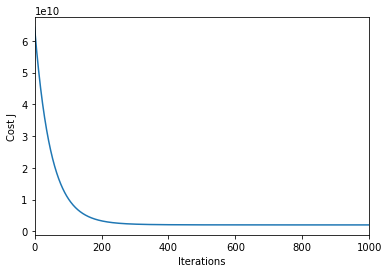

[ 340397.96353532  108742.65627238   -5873.22993383]


In [8]:
#Lets plot something
plt.xlim(0,num_iters)
plt.plot(J_history)
plt.ylabel('Cost J')
plt.xlabel('Iterations')
plt.show()

print(theta)

In [9]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X, y)

inputXs = np.array([[1, 100, 3], [1, 200, 3]])
sklearnPrediction = clf.predict(inputXs)

gradientDescentPrediction = inputXs.dot(theta)

print(sklearnPrediction, gradientDescentPrediction)

print("Looks Good :D")

[ 11265457.24197616  22210236.88894034] [ 11197043.90097156  22071309.52820928]
Looks Good :D
